In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import matplotlib
from copy import copy
import torch.nn.functional as F
import json
import sys
sys.path.append("../")
sys.path.append("../../")
from denoiser import DDIM, DDPM
from data_manager.get_dataset import get_dataset
# Set dpi for matplotlib
# matplotlib.rcParams['figure.dpi'] = 100
def setdpi(x):
    matplotlib.rcParams['figure.dpi'] = x
setdpi(150)
# use latex for font rendering
plt.rcParams["text.usetex"] = True # Comment out if you don't have latex installed
#  "text.latex.preamble": r"\usepackage{bm}",
plt.rcParams["text.latex.preamble"] = r"\usepackage{bm}"
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'




# Shifted prior

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
log_name = "Low2DUnimodal"
ddim1 = DDIM.load_from_training_log(f"../../logs/training/{log_name}", model_name="ema_model.pt", device=device)
ddim1.eval()
ddim1.to(device);


cpu
Loading model...
Creating instance of class...
Denoiser initialized


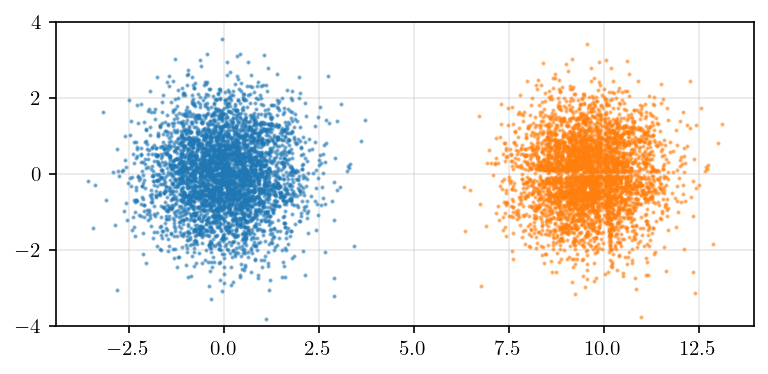

In [4]:
ddim1.eta = 0
latents = torch.randn(4000, *ddim1.data_shape).to(device)
samples = ddim1.sample(device, latents=latents, timesteps = 20)
fig, ax = plt.subplots(1, 1)
ax.grid(alpha=0.3)
# Draw grid behind
ax.set_axisbelow(True)
ax.scatter(latents[:, 0], latents[:, 1], s=1, alpha=0.5, rasterized=True)
ax.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5, rasterized=True)

fig.gca().set_aspect('equal', adjustable='box')
ax.set_ylim(-4, 4)
# fig.savefig("figures/low_dim/shifted_prior/normal_sampling_ddim.pdf", bbox_inches='tight')

### Sample from only outliers one std away from the prior mean using DDPM

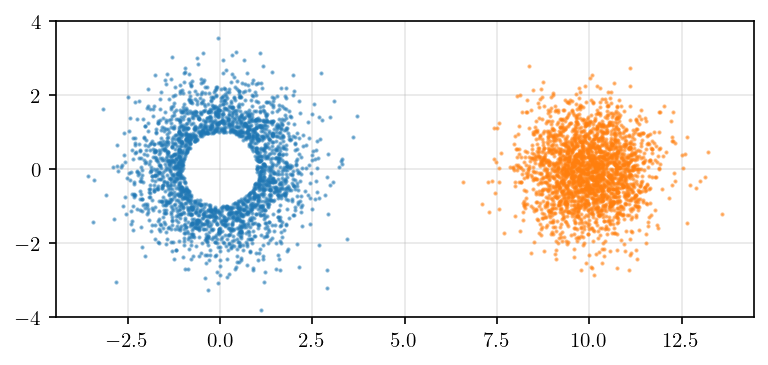

In [5]:
ddim1.eta = 1
norms = torch.norm(latents, dim=1)
radius = 1
new_latents = latents.clone()
new_latents = latents[norms > radius]
point_size = 1
samples = ddim1.sample(device, latents=new_latents, timesteps = 20)

fig, ax = plt.subplots(1, 1)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.scatter(new_latents[:, 0], new_latents[:, 1], s=point_size, alpha=0.5, rasterized=True)
ax.scatter(samples[:, 0], samples[:, 1], s=point_size, alpha=0.5, rasterized=True)

fig.gca().set_aspect('equal', adjustable='box')
ax.set_ylim(-4, 4)

# fig.savefig("figures/low_dim/shifted_prior/outliers_sampling_ddpm.pdf", bbox_inches='tight')

# Remove ticks

### Sample from only outliers one std away from the prior mean using DDIM

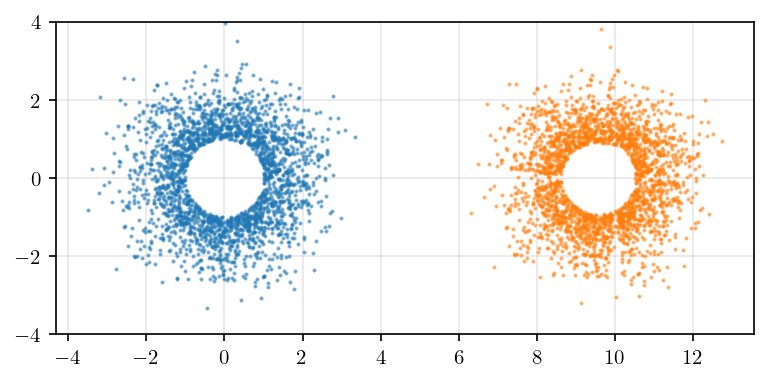

In [25]:
ddim1.eta = 0
norms = torch.norm(latents, dim=1)
radius = 1
new_latents = latents.clone()
new_latents = latents[norms > radius]
point_size = 1
samples = ddim1.sample(device, latents=new_latents, timesteps = 20)

fig, ax = plt.subplots(1, 1)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)

ax.scatter(new_latents[:, 0], new_latents[:, 1], s=point_size, alpha=0.5, rasterized=True)
ax.scatter(samples[:, 0], samples[:, 1], s=point_size, alpha=0.5, rasterized=True)
fig.gca().set_aspect('equal', adjustable='box')
ax.set_ylim(-4, 4)

# fig.savefig("figures/low_dim/shifted_prior/outliers_sampling_ddim.pdf", bbox_inches='tight')
# Remove ticks



# Symmetric setup 

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
log_name = "Low2DUnimodal_4"
ddim2 = DDIM.load_from_training_log(f"../../logs/training/{log_name}", model_name="ema_model.pt", device=device)
ddim2.eval()
ddim2.to(device);

Loading model...
Creating instance of class...
Denoiser initialized


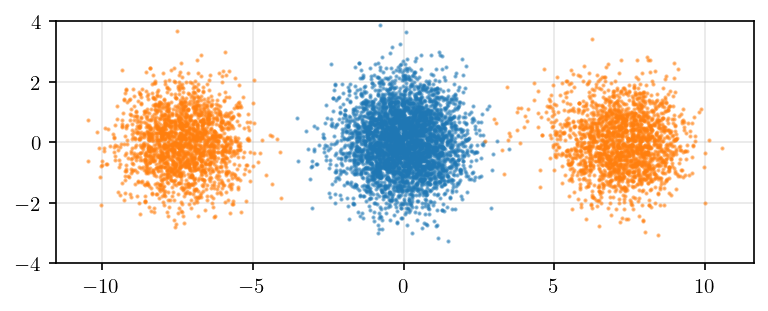

In [46]:
ddim2.eta = 0
latents = torch.randn(4000, *ddim2.data_shape).to(device)
samples = ddim2.sample(device, latents=latents, timesteps = 20)

fig, ax = plt.subplots(1, 1)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.scatter(latents[:, 0], latents[:, 1], s=1, alpha=0.5, rasterized=True)
ax.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5, rasterized=True)

ax.set_ylim(-4, 4)

fig.gca().set_aspect('equal', adjustable='box')

# fig.savefig("figures/low_dim/symmetric_bimodal/normal_sampling_ddim2.pdf", bbox_inches='tight')


### Sample from only outliers one std away from the prior mean using DDPM

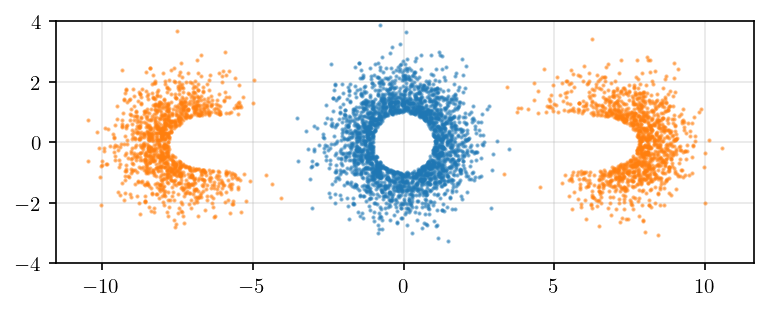

In [47]:
ddim2.eta = 0
# latents = torch.randn(4000, *ddim2.data_shape).to(device)
norms = torch.norm(latents, dim=1)
radius = 1
new_latents = latents.clone()
new_latents = latents[norms > radius]
point_size = 1
samples = ddim2.sample(device, latents=new_latents, timesteps = 20)

fig, ax = plt.subplots(1, 1)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.scatter(new_latents[:, 0], new_latents[:, 1], s=point_size, alpha=0.5, rasterized=True)
ax.scatter(samples[:, 0], samples[:, 1], s=point_size, alpha=0.5, rasterized=True)
fig.gca().set_aspect('equal', adjustable='box')
ax.set_ylim(-4, 4)

# fig.savefig("figures/low_dim/symmetric_bimodal/outliers_sampling_ddim2.pdf", bbox_inches='tight')

### Looking more closely at the right mode

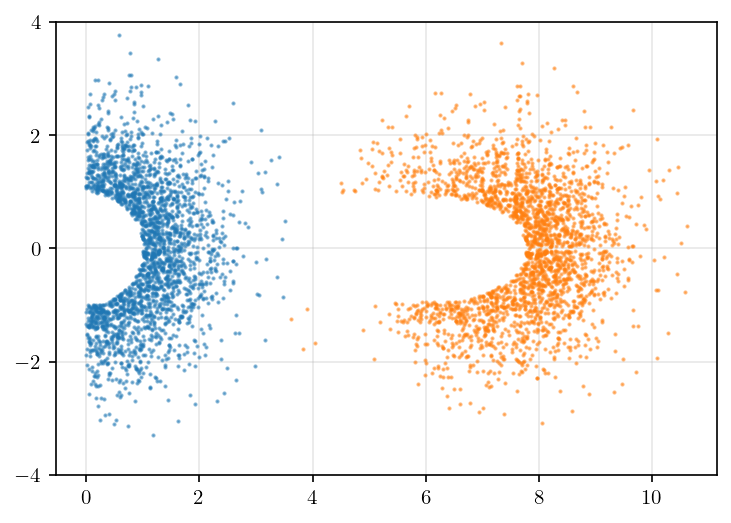

In [85]:
ddim2.eta = 0
latents = torch.randn(8000, *ddim2.data_shape).to(device)
norms = torch.norm(latents, dim=1)
radius = 1

new_latents = latents.clone()
new_latents = latents[norms > radius]
# new_latents = latents[latents[:, 0] >= 0.1 and latents[:, 1] >= 0.1]
new_latents = new_latents[new_latents[:, 0] >= 0]
point_size = 1
samples = ddim2.sample(device, latents=new_latents, timesteps = 20)

fig, ax = plt.subplots(1, 1)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)

ax.scatter(new_latents[:, 0], new_latents[:, 1], s=point_size, alpha=0.5, rasterized=True)
plt.scatter(samples[:, 0], samples[:, 1], s=point_size, alpha=0.5, rasterized=True)
fig.gca().set_aspect('equal', adjustable='box')
ax.set_ylim(-3.5, 3.5)
ax.set_yticks(np.arange(-4, 4.1, 2))

# fig.savefig("figures/low_dim/symmetric_bimodal/outliers_half_sampling_ddim2.pdf", bbox_inches='tight')

### Display data points one std away from its center, and the corresponding latents they originated from

tensor(7.2701)
tensor([False,  True, False,  ..., False, False, False])


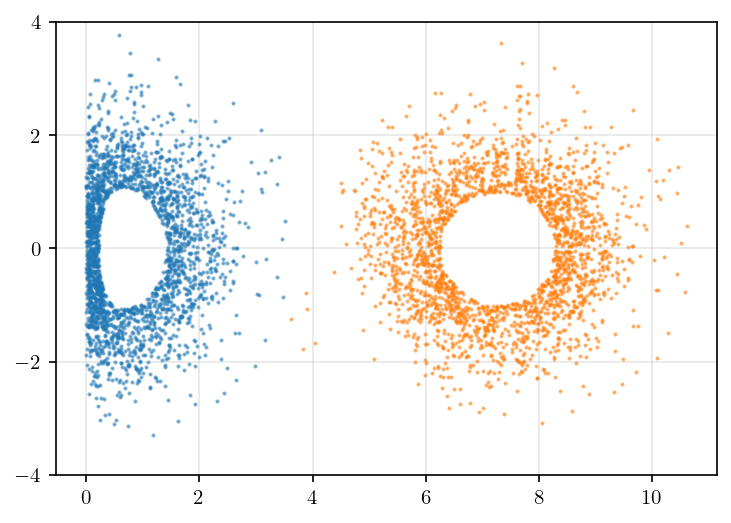

In [86]:
ddim2.eta = 0
norms = torch.norm(latents, dim=1)
radius = 1

new_latents = latents.clone()
# new_latents = latents[norms > radius]
# new_latents = latents[latents[:, 0] >= 0.1 and latents[:, 1] >= 0.1]
new_latents = new_latents[new_latents[:, 0] >= 0]

point_size = 1
samples = ddim2.sample(device, latents=new_latents, timesteps = 20)

print(samples.mean(dim=0)[0])
mask = torch.norm(samples-torch.tensor([samples.mean(dim=0)[0], 0]), dim=1) > radius
print(mask)

samples = samples[mask]
new_latents = new_latents[mask]

fig, ax = plt.subplots(1, 1)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)

ax.scatter(new_latents[:, 0], new_latents[:, 1], s=point_size, alpha=0.5, rasterized=True)

ax.scatter(samples[:, 0], samples[:, 1], s=point_size, alpha=0.5, rasterized=True)
plt.gca().set_aspect('equal', adjustable='box')

ax.set_ylim(-3.5, 3.5)
ax.set_yticks(np.arange(-4, 4.1, 2))


# fig.savefig("figures/low_dim/symmetric_bimodal/outliers_half_data_view_sampling_ddim2.pdf", bbox_inches='tight')

# CDF mapping in two dimensions

In [87]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
log_name = "Low2DSCurve"
# log_name = "Low2DUnimodal_4"
ddim3 = DDIM.load_from_training_log(f"../../logs/training/{log_name}", model_name="ema_model.pt", device=device)
args = json.load(open(f"../../logs/training/{log_name}/args.json", "r"))
ddim3.eval()
ddim3.to(device);


cpu
Loading model...
Creating instance of class...
Denoiser initialized


In [88]:
n = 10000#20000
latents = torch.randn(n, *ddim3.data_shape).to(device)
data = get_dataset(args["dataset"], root="../data", mus=args["mus"], sigmas=args["sigmas"]).tensors[0].to(device)[:n]
# data = torch.randn(n, 2).to(device)

No transform found for dataset:  s_curve_2d_transformed


### Perform CDF mapping starting from x and then y

Points in stripe: 802
Point in prior with cdfs=(0.097 and 0.758)  is (-1.30, 0.70)
Empirical method:
Point in data with cdfs=(0.097 and 0.758)  is (-1.78, 1.12)
DDIM method:
Point in data with cdfs=(0.097 and 0.758)  is (-1.83, 1.10)
Error: 0.055


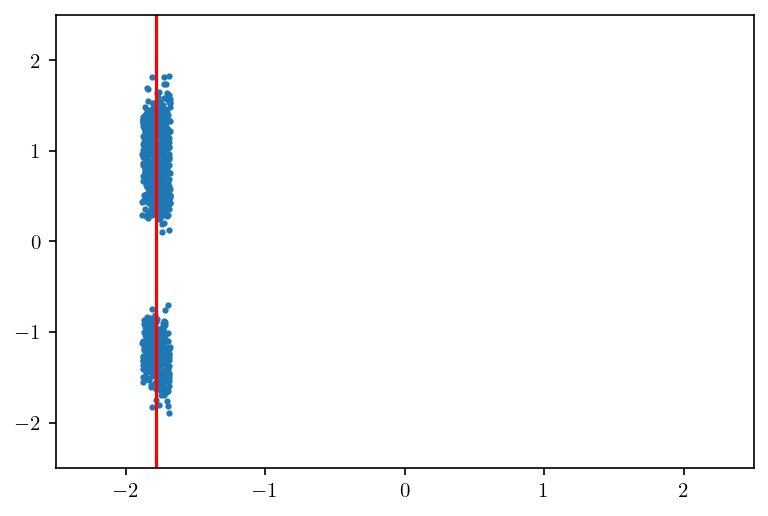

In [89]:
# %matplotlib inline
xlim = (-2.5, 2.5)
ylim = (-2.5, 2.5)
# xlim = (-2.5*4, 2.5*4)
# ylim = (-2.5*1.5, 2.5*1.5)

plt.xlim(xlim)
plt.ylim(ylim)

x = -1.3
y = 0.7
pointsimple = torch.tensor([x, y]).to(device)
pointsimplex, pointsimpley = pointsimple[0], pointsimple[1]
cdfx = norm.cdf(x)
cdfy = norm.cdf(y)

# Sort by x
sortx_indices = torch.argsort(data[:, 0])
sortx = data[sortx_indices]
pointcomplexx = sortx[int(cdfx * n)][0]

margin = 0.05*2
data_mask = (sortx[:, 0] > pointcomplexx - margin) & (sortx[:, 0] < pointcomplexx + margin)
data_masknot = ~data_mask
ystripe = sortx[data_mask]
print(f"Points in stripe: {len(ystripe)}")

sortystripe_indices = torch.argsort(ystripe[:, 1])
sortystripe = ystripe[sortystripe_indices]
pointcomplexy = sortystripe[int(cdfy * len(ystripe))][1]
pointcomplex = torch.tensor([pointcomplexx, pointcomplexy]).to(device)

plt.scatter(ystripe[:, 0], ystripe[:, 1], s=4)
plt.axvline(pointcomplexx, color="red")

print(f"Point in prior with cdfs=({cdfx:.3f} and {cdfy:.3f})  is ({pointsimple[0]:.2f}, {pointsimple[1]:.2f})")
print("Empirical method:")
print(f"Point in data with cdfs=({cdfx:.3f} and {cdfy:.3f})  is ({pointcomplex[0]:.2f}, {pointcomplex[1]:.2f})")

latent = pointsimple.unsqueeze(0).float()
ddimpoint = ddim3.sample(device, latents=latent, timesteps=30)

print(f"DDIM method:")
print(f"Point in data with cdfs=({cdfx:.3f} and {cdfy:.3f})  is ({ddimpoint[0, 0]:.2f}, {ddimpoint[0, 1]:.2f})")
error = torch.norm(pointcomplex - ddimpoint[0])
print(f"Error: {error:.3f}")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Points in stripe: 802
tensor(0.) tensor(1.)
torch.Size([802]) torch.Size([802, 2])


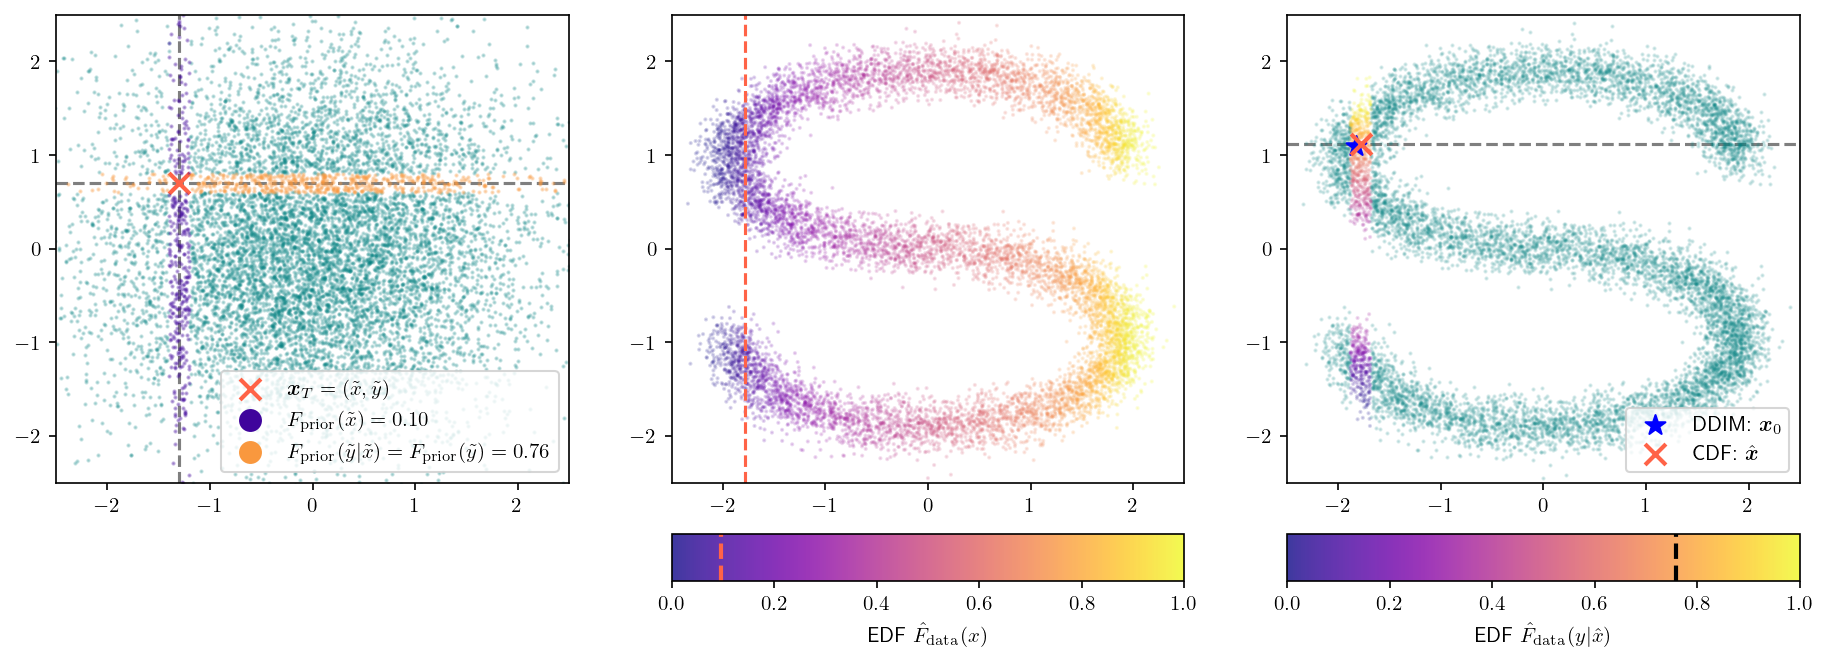

In [90]:
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 0.1])
cmap = "plasma"
color_map = copy(plt.cm.get_cmap(cmap))

dist_alpha = 0.15
map_color = "tomato"
ddim_map_color = "blue"

maskx = (latents[:, 0] > pointsimplex - margin) & (latents[:, 0] < pointsimplex + margin)
masky = (latents[:, 1] > pointsimpley - margin) & (latents[:, 1] < pointsimpley + margin)

mask = maskx & masky
mask_none = ~maskx & ~masky
# mask1, mask2 = mask1 & ~mask2, ~mask1 & mask2
maskx, masky = maskx & ~masky, ~maskx & masky
rasterized = True

ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(pointsimple[0], pointsimple[1], s=100, c=map_color, marker="x", label="$\\boldsymbol{x}_{T} = (\\tilde{x}, \\tilde{y})$", linewidths=2)
ax1.scatter(latents[mask_none, 0], latents[mask_none, 1], s=1, alpha=dist_alpha*1.5, c="teal", rasterized=rasterized)
ax1.scatter(latents[maskx][:, 0], latents[maskx][:, 1], s=1, alpha=dist_alpha*2, c=matplotlib.cm.get_cmap(cmap)(cdfx), label=f"$F_{{\\mathrm{{prior}}}}(\\tilde{{x}})={cdfx:.2f}$", rasterized=rasterized)
ax1.axhline(pointsimpley, color="black", linestyle="--", alpha=0.5, zorder=-1)
# ax1.scatter(latents[masky][:, 0], latents[masky][:, 1], s=1, alpha=dist_alpha*2, c="purple", label=f"$F_{{\\mathrm{{prior}}}}(y | x)=F_{{\\mathrm{{prior}}}}(y)={{\\beta}}$")
ax1.scatter(latents[masky][:, 0], latents[masky][:, 1], s=1, alpha=dist_alpha*2, c=matplotlib.cm.get_cmap(cmap)(cdfy), label=f"$F_{{\\mathrm{{prior}}}}(\\tilde{{y}} | \\tilde{{x}})=F_{{\\mathrm{{prior}}}}(\\tilde{{y}})={cdfy:.2f}$", rasterized=rasterized)
ax1.axvline(pointsimplex, color="black", linestyle="--", alpha=0.5, zorder=-1)
# set legend point size to 10 for the first legend entry
leg = ax1.legend(loc="lower right")
# leg.legendHandles = [h for h in ]
for handle in leg.legendHandles:
    handle.set_sizes([100])
    handle.set_alpha(1)

ax2 = fig.add_subplot(gs[0, 1])
ax2color = fig.add_subplot(gs[1, 1])

# ax_prior.scatter(prior_y_values, dist_x_values, c=matplotlib.cm.get_cmap(cmap)(prior_y_values/(gaussian_complex.max())), s=curve_s)
normalized = (sortx[:, 0] - sortx[:, 0].min()) / (sortx[:, 0].max() - sortx[:, 0].min())
scatter2 = ax2.scatter(sortx[:, 0], sortx[:, 1], s=1, alpha=dist_alpha, cmap=matplotlib.cm.get_cmap(cmap), c=np.linspace(0, 1, len(normalized)), rasterized=rasterized)
ax2.axvline(pointcomplexx, color="tomato", linestyle="--")
cbar = plt.colorbar(scatter2, cax=ax2color, orientation="horizontal")
cbar.set_label(f"EDF $\\hat{{F}}_{{\\mathrm{{data}}}}(x)$")
cbar.set_alpha(0.8)
cbar.draw_all()
ax2color.axvline(cdfx, color="tomato", label=f"$F_{{\\mathrm{{prior}}}}(x)={cdfx:.2f}$", linewidth=2, linestyle="--")
# ax2.legend()


ax3 = fig.add_subplot(gs[0, 2])
ax3color = fig.add_subplot(gs[1, 2])
# Create mask to find points data that are in stripey
stripe_mask = (sortx[:, 0] > pointcomplexx - margin) & (sortx[:, 0] < pointcomplexx + margin)
print(f"Points in stripe: {stripe_mask.sum()}")
stripe_masknot = ~stripe_mask

normalized_stripe = (sortx[stripe_mask, 1] - sortx[stripe_mask, 1].min()) / (sortx[stripe_mask, 1].max() - sortx[stripe_mask, 1].min())
sortstripe = sortx[stripe_mask]
sortstripe_indices = torch.argsort(sortstripe[:, 1])
sortstripe = sortstripe[sortstripe_indices]
print(normalized_stripe.min(), normalized_stripe.max())
print(normalized_stripe.shape, sortstripe.shape)
ax3.scatter(sortx[stripe_masknot][:, 0], sortx[stripe_masknot][:, 1], s=1, alpha=dist_alpha, c="teal", rasterized=rasterized)
scatter3 = ax3.scatter(sortstripe[:, 0], sortstripe[:, 1], s=1, alpha=dist_alpha, cmap=matplotlib.cm.get_cmap(cmap), c=np.linspace(0, 1, len(sortstripe)), rasterized=rasterized)
ax3.axhline(pointcomplexy, color="black", linestyle="--", alpha=0.5, zorder=-1)


cbar2 = plt.colorbar(scatter3, ax3color, orientation="horizontal")
cbar2.set_label("EDF $\\hat{{F}}_{{\\mathrm{{data}}}}(y | \\hat{{x}})$")
cbar2.set_alpha(0.8)
cbar2.draw_all()
ax3color.axvline(cdfy, color="black", label=f"$F_{{\\mathrm{{prior}}}}(x)={cdfy:.2f}$", linewidth=2, linestyle="--")


ax3.scatter(ddimpoint[0, 0], ddimpoint[0, 1], s=100, c=ddim_map_color, label="DDIM: $\\boldsymbol{x}_{0}$", marker="*")
ax3.scatter(pointcomplex[0], pointcomplex[1], s=100, c=map_color, label="CDF: $\\hat{{\\boldsymbol{x}}}$", marker="x", linewidths=2)
leg = ax3.legend(loc="lower right")
for handle in leg.legendHandles[:-1]:
    handle.set_sizes([100])


for a in [ax1, ax2, ax3]:
    a.set_ylim(ylim)
    a.set_xlim(xlim)

# Save as pdf 
# fig.savefig("s_curve.pdf", bbox_inches="tight")

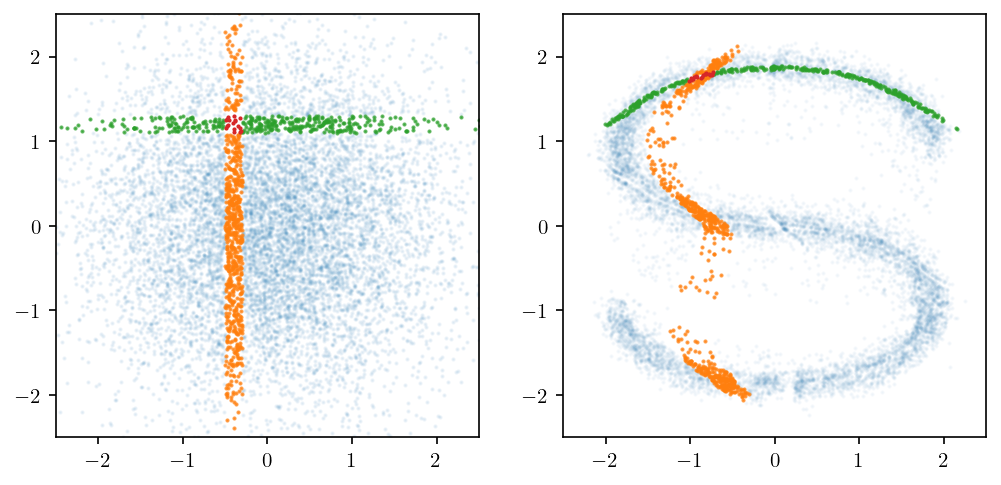

In [93]:
n = 10000
latents = torch.randn(n, *ddim3.data_shape).to(device)
ddim3.eta = 0
new_latents = latents.clone()
samples = ddim3.sample(device, latents=new_latents, timesteps = 20)

x = -0.4
y = 1.2
margin = 0.1
mask1 = (latents[:, 0] > x - margin) & (latents[:, 0] < x + margin)
mask2 = (latents[:, 1] > y - margin) & (latents[:, 1] < y + margin)
fig, axes = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [1, 1]})

mask = mask1 & mask2
mask_none = ~mask1 & ~mask2
mask1, mask2 = mask1 & ~mask2, ~mask1 & mask2

point_size = 1

alphas = [[0.08, 0.04], 0.7, 0.7, 1]
# all alphas to 1
# alphas = [1, 1, 1, 1]
masks = [mask_none, mask1, mask2, mask ]

# axes[0].set_title("Latent space")
# axes[1].set_title("Data space")
for ax in axes:
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect("equal")

for m, a in zip(masks, alphas):

    if type(a) == list:
        a1, a2 = a
    else:
        a1, a2 = a, a
    axes[0].scatter(new_latents[m, 0], new_latents[m, 1], s=point_size, alpha=a1, rasterized=True)
    axes[1].scatter(samples[m, 0], samples[m, 1], s=point_size, alpha=a2, rasterized=True)

# axes[0].scatter(new_latents[~mask1, 0], new_latents[~mask1, 1], s=point_size, alpha=0.5)
# axes[1].scatter(samples[~mask1, 0], samples[~mask1, 1], s=point_size, alpha=0.5)

# Save as pdf
# fig.savefig("s_curve_samples.pdf", bbox_inches="tight")


## Testing with y

Points in stripe: 502
Point in prior with cdfs=(0.097 and 0.758)  is (-1.30, 0.70)
Empirical method:
Point in data with cdfs=(0.097 and 0.758)  is (-1.90, 1.32)
DDIM method:
Point in data with cdfs=(0.097 and 0.758)  is (-1.83, 1.10)
Error: 0.230


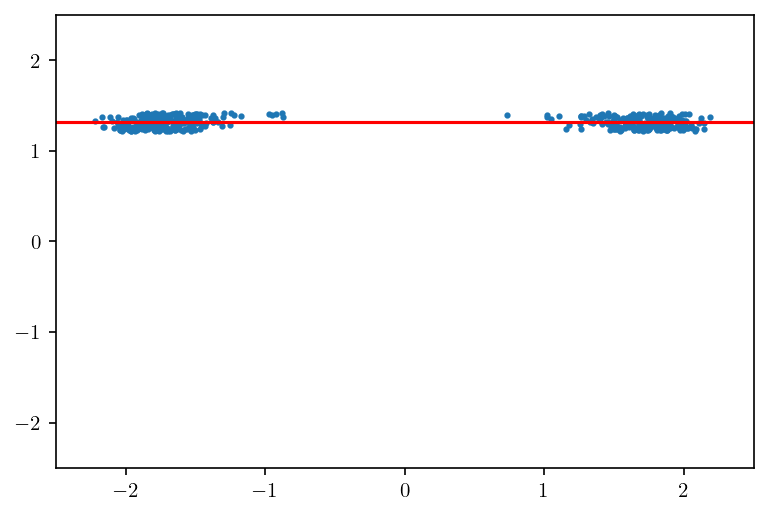

In [91]:
plt.ylim(ylim)
plt.xlim(xlim)
# %matplotlib inline
# x = -1
# y = 0.7
# x = -1.3
# y = 0.7
pointsimple = torch.tensor([x, y]).to(device)
pointsimplex, pointsimpley = pointsimple[0], pointsimple[1]
cdfx = norm.cdf(x)
cdfy = norm.cdf(y)

# Sort by x
sorty_indices = torch.argsort(data[:, 1])
sorty = data[sorty_indices]
pointcomplexy = sorty[int(cdfy * n)][1]


margin = 0.05*2
data_mask = (sorty[:, 1] > pointcomplexy - margin) & (sorty[:, 1] < pointcomplexy + margin)
data_masknot = ~data_mask
xstripe = sorty[data_mask]
print(f"Points in stripe: {len(xstripe)}")

sortxstripe_indices = torch.argsort(xstripe[:, 0])
sortxstripe = xstripe[sortxstripe_indices]
pointcomplexx = sortxstripe[int(cdfx * len(xstripe))][0]
pointcomplex = torch.tensor([pointcomplexx, pointcomplexy]).to(device)

plt.scatter(xstripe[:, 0], xstripe[:, 1], s=4)
plt.axhline(pointcomplexy, color="red")

print(f"Point in prior with cdfs=({cdfx:.3f} and {cdfy:.3f})  is ({pointsimple[0]:.2f}, {pointsimple[1]:.2f})")
print("Empirical method:")
print(f"Point in data with cdfs=({cdfx:.3f} and {cdfy:.3f})  is ({pointcomplex[0]:.2f}, {pointcomplex[1]:.2f})")

latent = pointsimple.unsqueeze(0).float()
ddimpoint = ddim3.sample(device, latents=latent, timesteps=30)

print(f"DDIM method:")
print(f"Point in data with cdfs=({cdfx:.3f} and {cdfy:.3f})  is ({ddimpoint[0, 0]:.2f}, {ddimpoint[0, 1]:.2f})")
error = torch.norm(pointcomplex - ddimpoint[0])
print(f"Error: {error:.3f}")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Points in stripe: 502
tensor(0.) tensor(1.)
torch.Size([502]) torch.Size([502, 2])


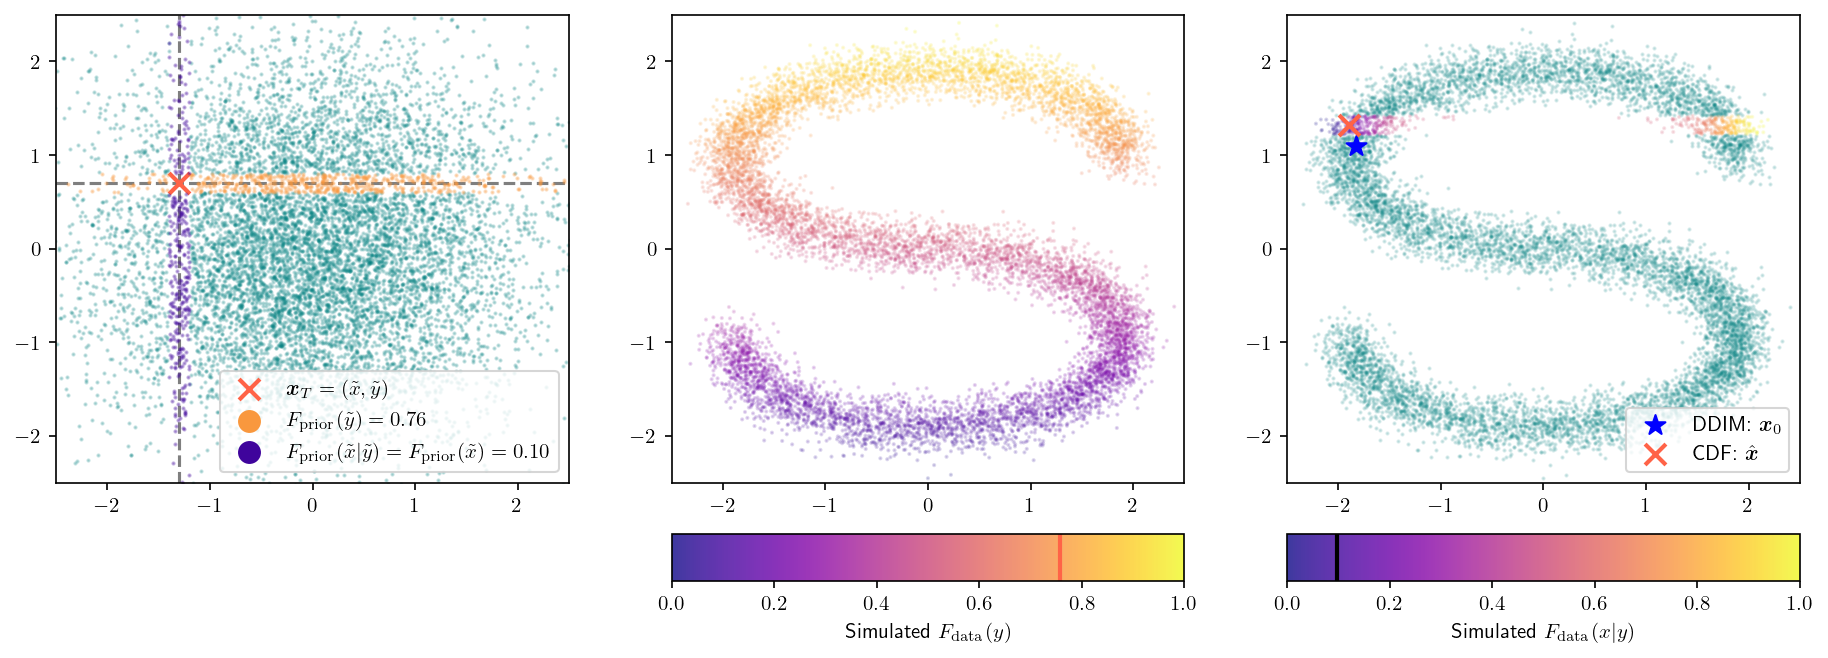

In [95]:
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 0.1])
cmap = "plasma"
color_map = copy(plt.cm.get_cmap(cmap))

dist_alpha = 0.15
map_color = "tomato"
ddim_map_color = "blue"

maskx = (latents[:, 0] > pointsimplex - margin) & (latents[:, 0] < pointsimplex + margin)
masky = (latents[:, 1] > pointsimpley - margin) & (latents[:, 1] < pointsimpley + margin)

mask = maskx & masky
mask_none = ~maskx & ~masky
# mask1, mask2 = mask1 & ~mask2, ~mask1 & mask2
maskx, masky = maskx & ~masky, ~maskx & masky
rasterized = True

ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(pointsimple[0], pointsimple[1], s=100, c=map_color, marker="x", label="$\\boldsymbol{x}_{T} = (\\tilde{x}, \\tilde{y})$", linewidths=2)
ax1.scatter(latents[mask_none, 0], latents[mask_none, 1], s=1, alpha=dist_alpha*1.5, c="teal", rasterized=rasterized)
ax1.scatter(latents[masky][:, 0], latents[masky][:, 1], s=1, alpha=dist_alpha*2, c=matplotlib.cm.get_cmap(cmap)(cdfy), label=f"$F_{{\\mathrm{{prior}}}}(\\tilde{{y}})={cdfy:.2f}$", rasterized=rasterized)
ax1.scatter(latents[maskx][:, 0], latents[maskx][:, 1], s=1, alpha=dist_alpha*2, c=matplotlib.cm.get_cmap(cmap)(cdfx), label=f"$F_{{\\mathrm{{prior}}}}(\\tilde{{x}} | \\tilde{{y}})=F_{{\\mathrm{{prior}}}}(\\tilde{{x}})={cdfx:.2f}$", rasterized=rasterized)
ax1.axhline(pointsimpley, color="black", linestyle="--", alpha=0.5, zorder=-1)
# ax1.scatter(latents[masky][:, 0], latents[masky][:, 1], s=1, alpha=dist_alpha*2, c="purple", label=f"$F_{{\\mathrm{{prior}}}}(y | x)=F_{{\\mathrm{{prior}}}}(y)={{\\beta}}$")
ax1.axvline(pointsimplex, color="black", linestyle="--", alpha=0.5, zorder=-1)
# set legend point size to 10 for the first legend entry
leg = ax1.legend(loc="lower right")
# leg.legendHandles = [h for h in ]
for handle in leg.legendHandles:
    handle.set_sizes([100])
    handle.set_alpha(1)

ax2 = fig.add_subplot(gs[0, 1])
ax2color = fig.add_subplot(gs[1, 1])

# ax_prior.scatter(prior_y_values, dist_x_values, c=matplotlib.cm.get_cmap(cmap)(prior_y_values/(gaussian_complex.max())), s=curve_s)
normalized = (sortx[:, 1] - sortx[:, 1].min()) / (sortx[:, 1].max() - sortx[:, 1].min())
scatter2 = ax2.scatter(sortx[:, 0], sortx[:, 1], s=1, alpha=dist_alpha, cmap=matplotlib.cm.get_cmap(cmap), c=normalized, rasterized=rasterized)
cbar = plt.colorbar(scatter2, cax=ax2color, orientation="horizontal")
cbar.set_label(f"Simulated $F_{{\\mathrm{{data}}}}(y)$")
cbar.set_alpha(0.8)
cbar.draw_all()
ax2color.axvline(cdfy, color="tomato", label=f"$F_{{\\mathrm{{prior}}}}(x)={cdfy:.2f}$", linewidth=2)
# ax2.legend()


ax3 = fig.add_subplot(gs[0, 2])
ax3color = fig.add_subplot(gs[1, 2])
# Create mask to find points data that are in stripey
stripe_mask = (sorty[:, 1] > pointcomplexy - margin) & (sorty[:, 1] < pointcomplexy + margin)
print(f"Points in stripe: {stripe_mask.sum()}")
stripe_masknot = ~stripe_mask

normalized_stripe = (sorty[stripe_mask, 1] - sorty[stripe_mask, 1].min()) / (sorty[stripe_mask, 1].max() - sorty[stripe_mask, 1].min())
sortstripe = sorty[stripe_mask]
sortstripe_indices = torch.argsort(sortstripe[:, 0])
sortstripe = sortstripe[sortstripe_indices]
print(normalized_stripe.min(), normalized_stripe.max())
print(normalized_stripe.shape, sortstripe.shape)
ax3.scatter(sorty[stripe_masknot][:, 0], sorty[stripe_masknot][:, 1], s=1, alpha=dist_alpha, c="teal", rasterized=rasterized)
scatter3 = ax3.scatter(sortstripe[:, 0], sortstripe[:, 1], s=1, alpha=dist_alpha, cmap=matplotlib.cm.get_cmap(cmap), c=np.linspace(0, 1, len(sortstripe)), rasterized=rasterized)
cbar2 = plt.colorbar(scatter3, ax3color, orientation="horizontal")
cbar2.set_label("Simulated $F_{{\\mathrm{{data}}}}(x | y)$")
cbar2.set_alpha(0.8)
cbar2.draw_all()
ax3color.axvline(cdfx, color="black", label=f"$F_{{\\mathrm{{prior}}}}(x)={cdfx:.2f}$", linewidth=2)


ax3.scatter(ddimpoint[0, 0], ddimpoint[0, 1], s=100, c=ddim_map_color, label="DDIM: $\\boldsymbol{x}_{0}$", marker="*")
ax3.scatter(pointcomplex[0], pointcomplex[1], s=100, c=map_color, label="CDF: $\\hat{{\\boldsymbol{x}}}$", marker="x", linewidths=2)
leg = ax3.legend(loc="lower right")
for handle in leg.legendHandles[:-1]:
    handle.set_sizes([100])


for a in [ax1, ax2, ax3]:
    a.set_xlim(xlim)
    a.set_ylim(ylim)

# Save as pdf 
# # fig.savefig("s_curve.pdf", bbox_inches="tight")